In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print (digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [2]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and 

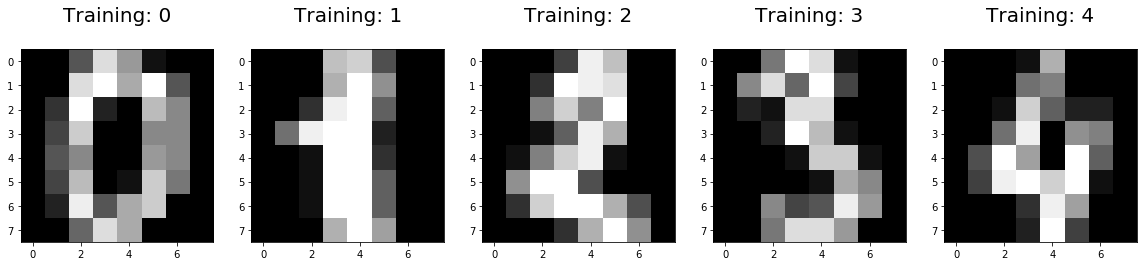

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print (X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [5]:
print (digits.target_names)
print(len(digits.target_names))

[0 1 2 3 4 5 6 7 8 9]
10


In [166]:
# 3.2 batch gradient descent (GD) for Logistic regression
# n - number of training examples
# m - number of features (excluding bias)
# c - number of classes
np.random.seed(8)
import time

def one_hot_encoded(y_train_in):
    # returns one-hot encoded labels
    y_train_ohe = np.zeros((y_train_in.size, len(digits.target_names)))
    y_train_ohe[np.arange(y_train_in.size), y_train_in] = 1
    return y_train_ohe
    
def softmax(Y_hat):
    """
    Parameters:
    -----------
    Y_hat: pre-softmax output i.e. XW + b, \in \mathcal_{R}^{n \times c}
    Returns:
    -----------
    softmax of Y_hat - (n x c) matrix
    """
    Z_prime = np.exp(Y_hat - np.max(Y_hat, axis=1).reshape(-1,1))
    Z_prime_summation = np.sum(Z_prime, axis=1).reshape(-1,1)
    normalized_probs = Z_prime / Z_prime_summation
    return normalized_probs

def LogisticRegression_GD(X_train, y_train, learning_rate):
    #TODO
    not_stop = True
    eps = 1e-6
    epss = 1e-4
    eta = 0.1
    
    num_features = X_train.shape[1]
    num_classes = len(digits.target_names)
    n = X_train.shape[0]
    
    y_train_ohe = one_hot_encoded(y_train)
   
    # parameters initialization
    W = np.random.randn(num_features, num_classes)
    b = np.random.rand(num_classes)
    
    prev_loss = np.inf
    iteration = 0
    loss_GD = []

    while not_stop:
        
        # calculate softmax output
        softmax_output = softmax(np.dot(X_train, W) + b)
        
        # evaluate loss F(W)
        loss = np.mean(-np.sum(y_train_ohe*np.log(softmax_output+eps), axis=1)) + eta*0.5*(np.sum(W*W))        
        
        # stopping criterio
        if np.abs(loss - prev_loss) <= epss:
            not_stop = False
            break;
        
        # gradient update
        dy = softmax_output - y_train_ohe
        dw = np.dot(X_train.T, dy)
        W -= (learning_rate*dw*(1/n) + learning_rate*eta*W)
        b -= learning_rate*(1/n)*np.sum(dy, axis=0)     
        
        prev_loss = loss
        iteration += 1
        loss_GD.append(loss)

    return W, b, loss_GD

In [167]:
def get_precision(W, b, X, y):
    num_examples = X.shape[0]
    softmax_output = softmax(np.dot(X, W) + b)
    predicted_classes = np.argmax(softmax_output, axis=1)
    precision = sum(predicted_classes == y)/num_examples
    return precision

---------------------------------------
learning rate = 0.05
training precision = 0.9888641425389755
test precision = 0.9622222222222222
Final value of F(W) =  0.24219299295571384
Number of iterations until convergence = 584
---------------------------------------
learning rate = 0.005
training precision = 0.994060876020787
test precision = 0.9622222222222222
Final value of F(W) =  0.2543112233071171
Number of iterations until convergence = 5264
---------------------------------------
learning rate = 0.01
training precision = 0.9903489235337788
test precision = 0.9711111111111111
Final value of F(W) =  0.2099061354405758
Number of iterations until convergence = 2948


Text(0, 0.5, 'loss')

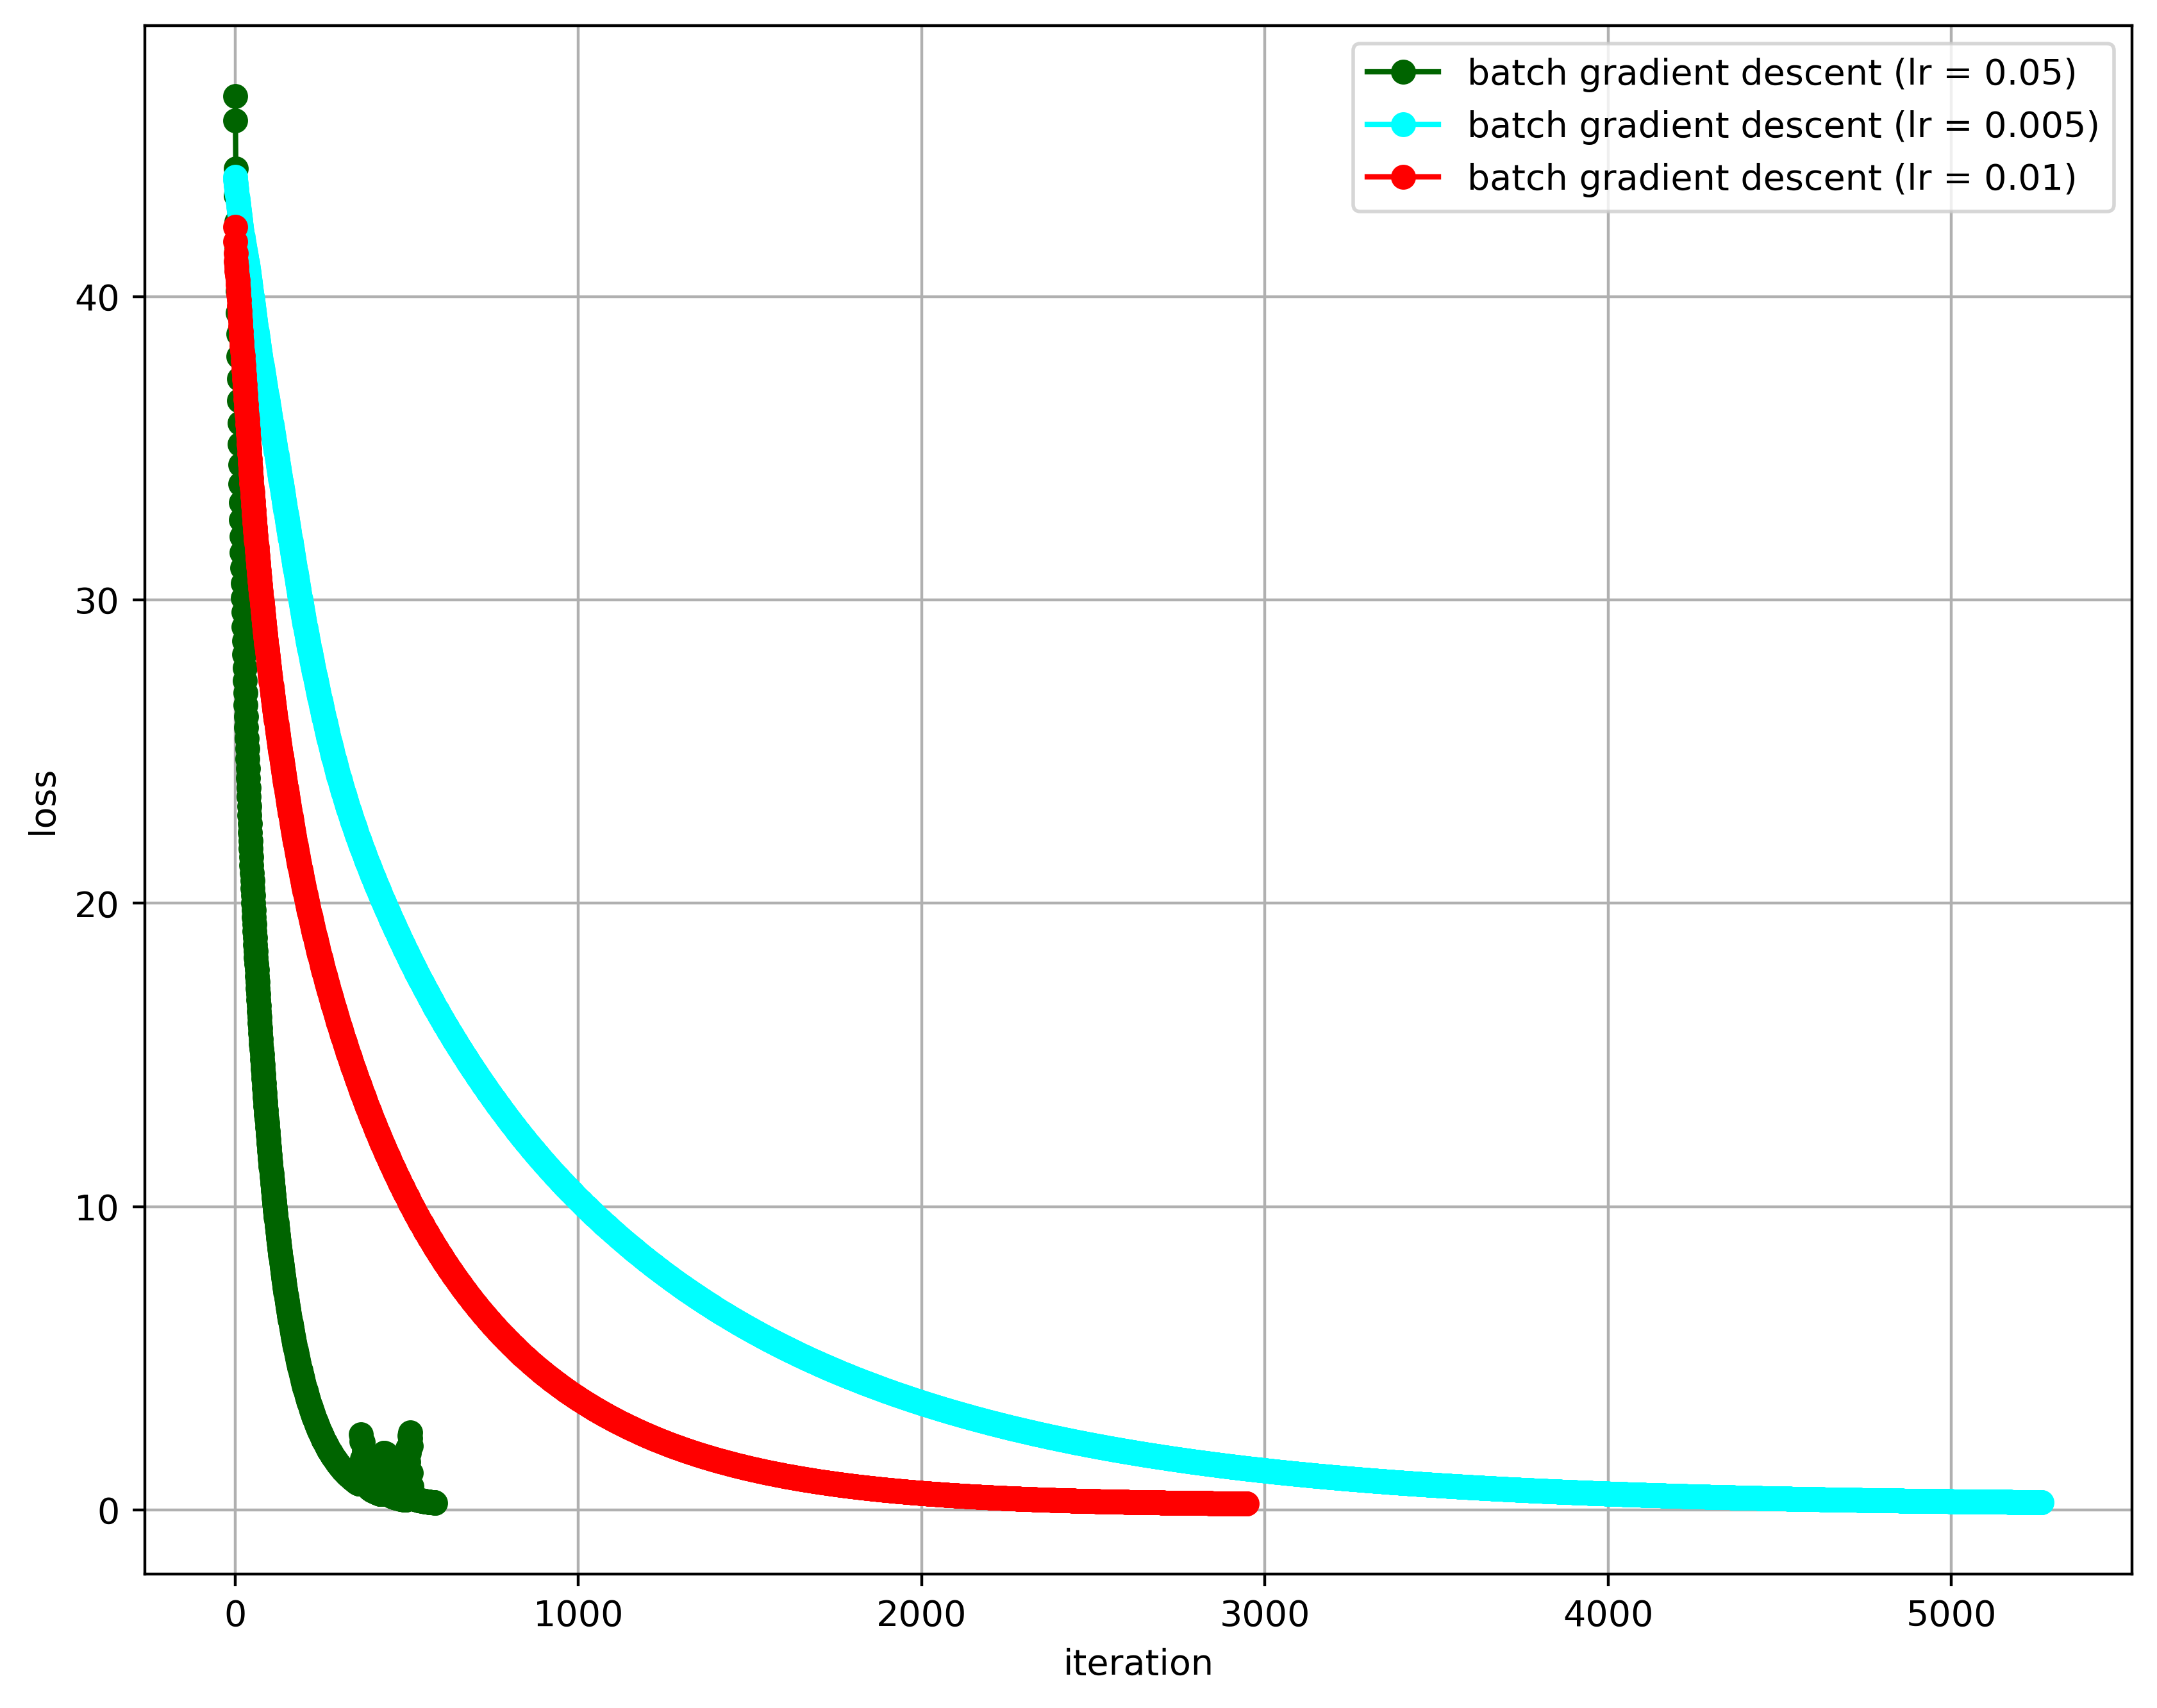

In [168]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
for i in range(len(learning_rate)):
    
    print ('---------------------------------------')
    print ('learning rate =', learning_rate[i])
    
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    #TODO
    prec_train = get_precision(W, b, X_train, y_train)
    print ('training precision =', prec_train)

    #TODO
    prec_test = get_precision(W, b, X_test, y_test)    
    print ('test precision =', prec_test)
    print ("Final value of F(W) = ", loss_GD[-1])
    print ("Number of iterations until convergence =", len(loss_GD))
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')

In [97]:
# 3.3 stochastic gradient descent (SGD) for Logistic regression
import random

def get_batch(X, y, batch_size):
    n = X.shape[0]
    indices = [i for i in range(n)]
    random.shuffle(indices)
    for i in range(0, n, batch_size):
        subbatch_idxs = indices[i:min(i+batch_size, n)]
        yield X[subbatch_idxs], y[subbatch_idxs]

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps = 1.0e-4, max_epoch=500):
    
    #TODO: initialization
    notstop = True
    epoch = 0
    loss = []    

    epss = 1e-6
    num_features = X.shape[1]
    num_classes = len(digits.target_names)
    W = np.random.randn(num_features, num_classes)
    b = np.random.rand(num_classes)
    n = X.shape[0]
    
    # optimization loop	
    while notstop and epoch < max_epoch:
        
        #TODO: SGD of each epoch
        loss_epoch = []
        for (x_batch, y_batch) in get_batch(X, y, batch_size):
            num = x_batch.shape[0]
            y_batch_ohe = one_hot_encoded(y_batch)
            softmax_output = softmax(np.dot(x_batch, W) + b)
            
            # evaluate loss for mini-batch
            loss_ = np.mean(-np.sum(y_batch_ohe*np.log(softmax_output+epss), axis=1)) + eta*0.5*(np.sum(W*W))
            loss_epoch.append(loss_)
            dy = softmax_output - y_batch_ohe
            dw = np.dot(x_batch.T, dy)
            
            # weight nad bias update using gradient descent
            W -= (lr * dw * (1/num) + lr * eta * W)
            b -= lr * (1/num) * np.sum(dy, axis=0)
        
        loss.append(np.mean(loss_epoch))
        # half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print ('reduce learning rate to', lr)
        
        # stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                notstop = False
                break
            
        epoch += 1
        
        #TODO: W and b
        # not doing anything as W and b are considered separately
    return (W, b, loss)

---------------------------------------
batch_size = 10
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
Time taken:  0.898658037185669
Number of epochs:  60
training precision = 0.9844097995545658
test precision = 0.9711111111111111
Final value of F(W) =  0.23845643040933526
Number of epochs until convergence = 60
---------------------------------------
batch_size = 50
reduce learning rate to 0.005
reduce learning rate to 0.0025
Time taken:  0.5199170112609863
Number of epochs:  105
training precision = 0.9821826280623608
test precision = 0.9622222222222222
Final value of F(W) =  0.23537204079707852
Number of epochs until convergence = 105
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
Time taken:  0.5679800510406494
Number of epochs:  162
training precision = 0.9844097995545658
test precision = 0.9711111111111111
Final value of F(W) =  0.2365305929168368
Number of epochs until convergence = 162


Text(0, 0.5, 'loss')

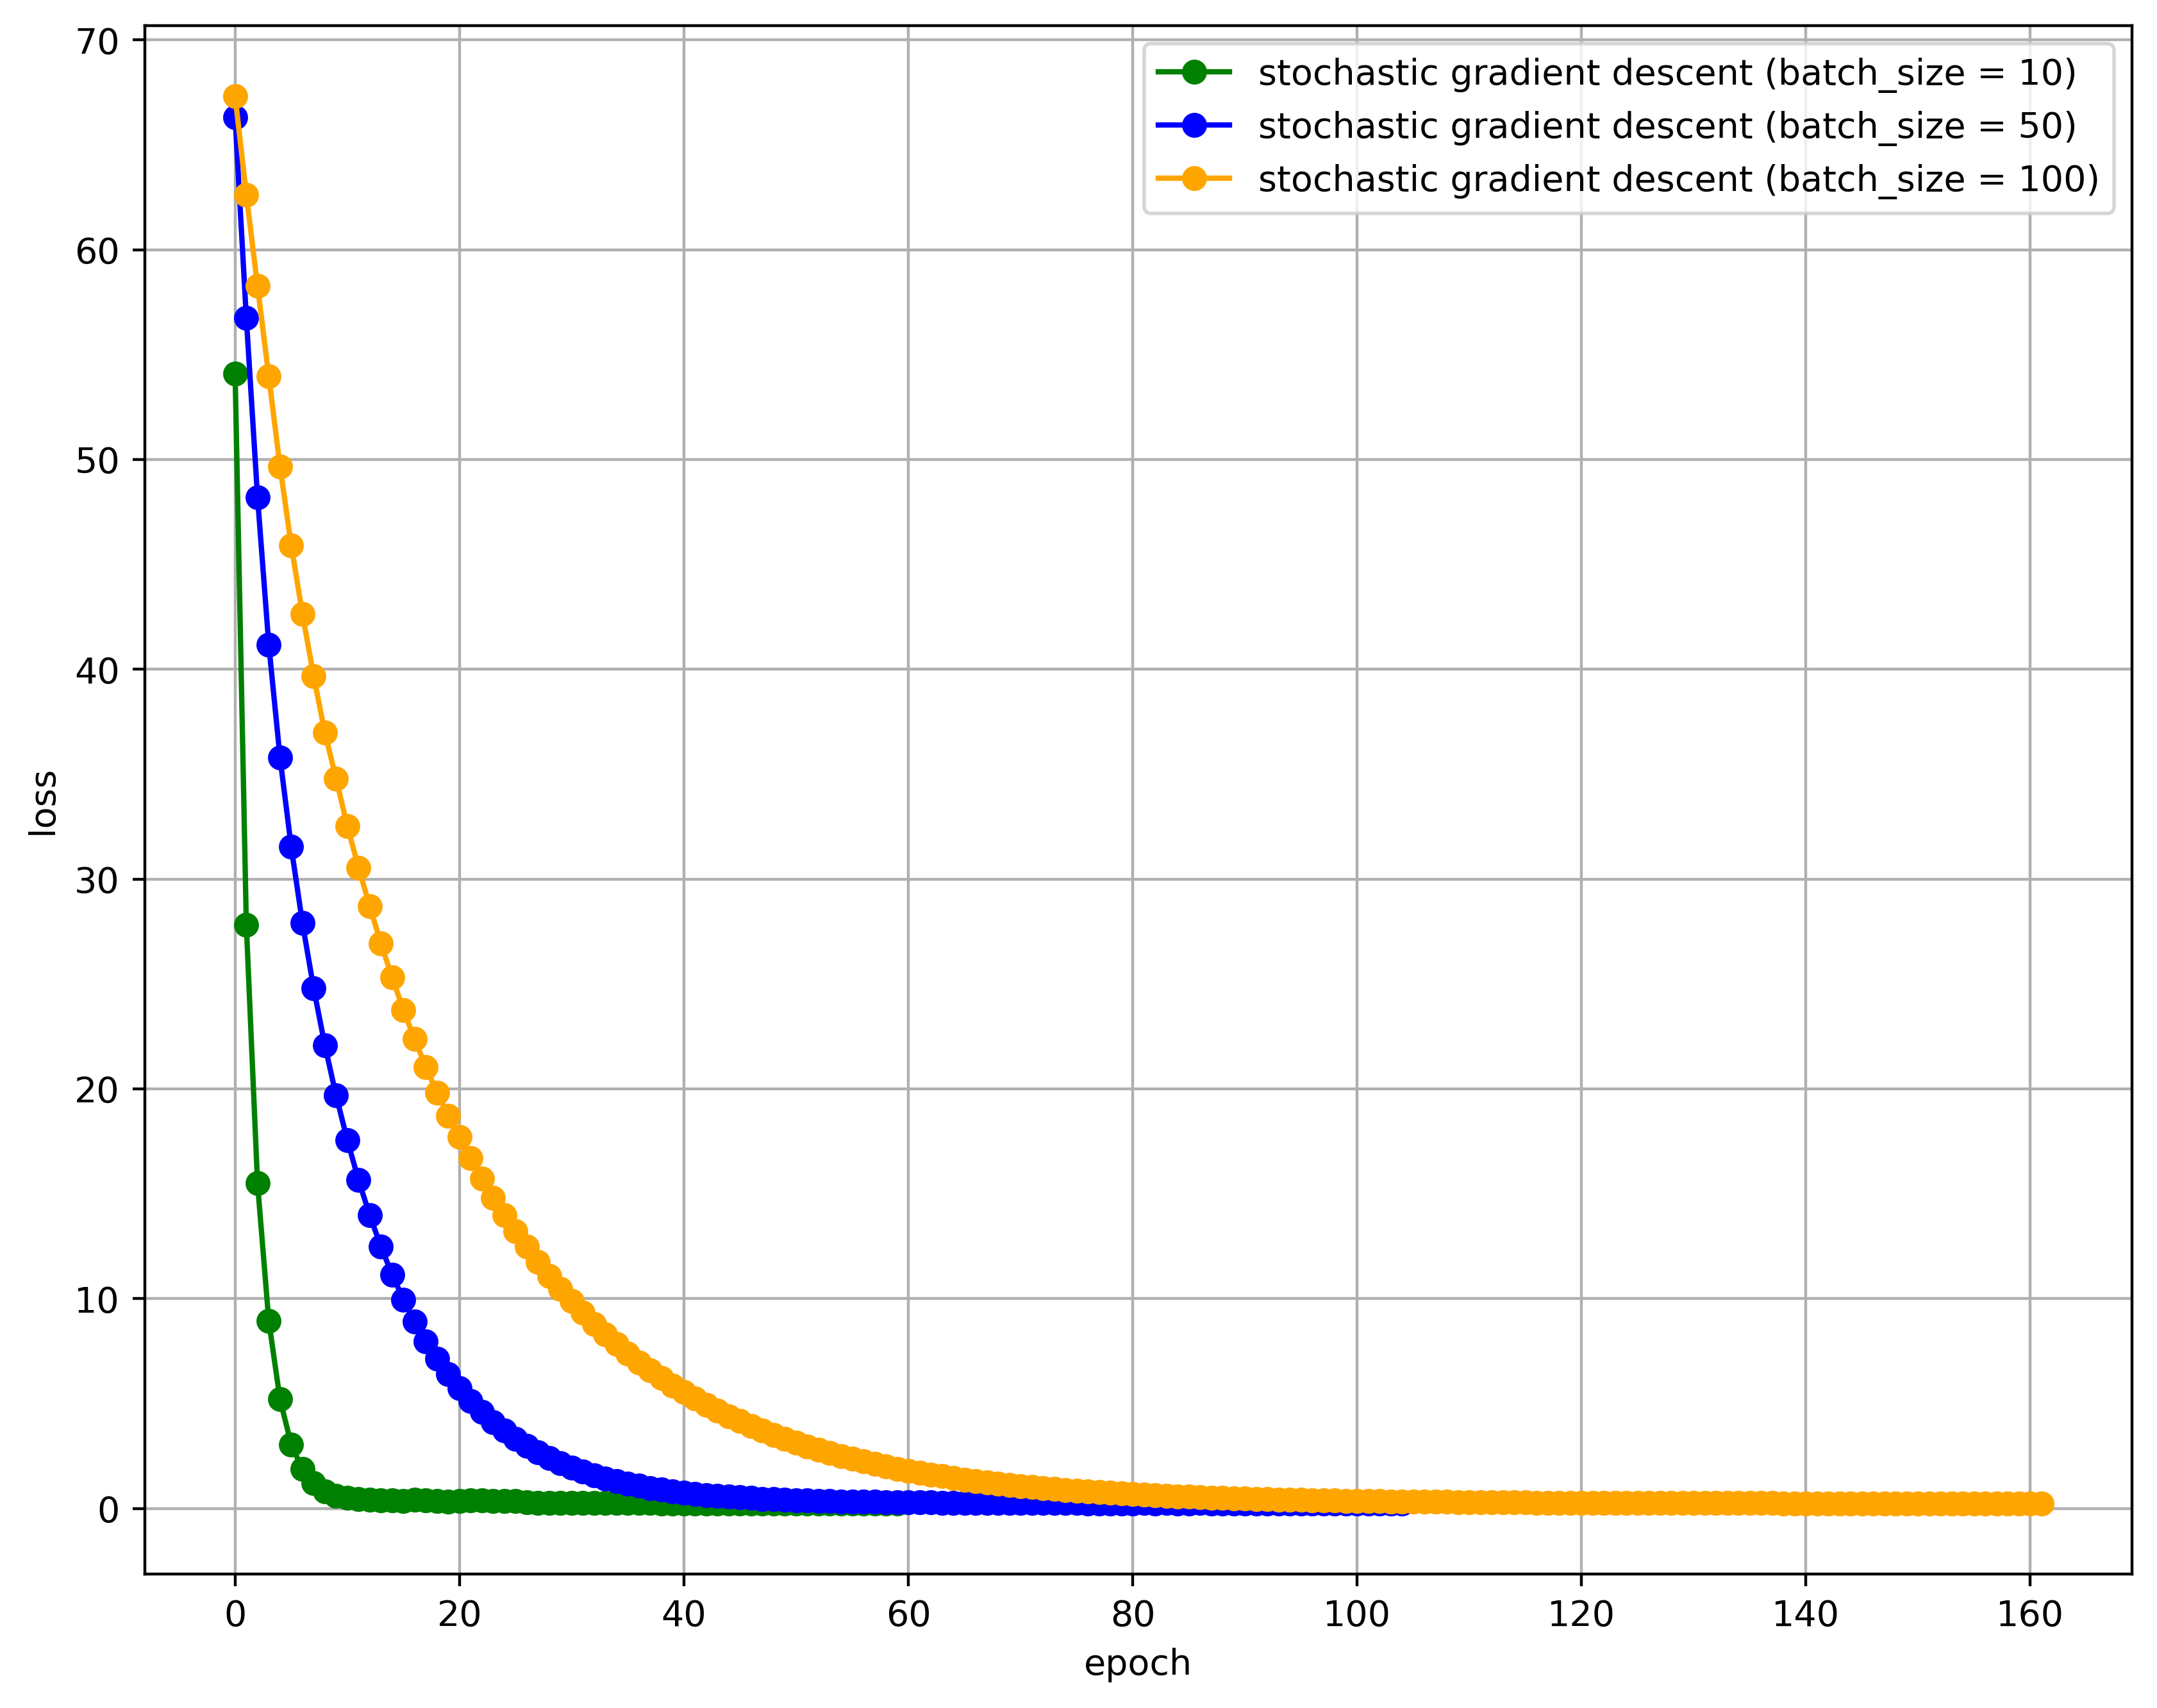

In [161]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# using same lr as asked in question (3d)
lr = [0.01, 0.01, 0.01]
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)

for i in range(len(bs)):
    
    print ('---------------------------------------')
    print ('batch_size =', bs[i])
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    print ("Time taken: ", (time.time()-start_time))
    print ("Number of epochs: ", len(loss_SGD))
    #TODO
    prec_train = get_precision(W, b, X_train, y_train)
    print ('training precision =', prec_train)

    #TODO
    prec_test = get_precision(W, b, X_test, y_test)
    print ('test precision =', prec_test)
    print ("Final value of F(W) = ", loss_SGD[-1])
    print ("Number of epochs until convergence =", len(loss_SGD))
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
Time taken:  2.3961181640625
Number of epochs:  162
training precision = 0.9784706755753526
test precision = 0.9644444444444444
Final value of F(W) =  0.24183815260674288
Number of epochs until convergence = 162
---------------------------------------
batch_size = 50
Time taken:  2.220634937286377
Number of epochs:  500
training precision = 0.9851521900519673
test precision = 0.9644444444444444
Final value of F(W) =  0.4189980056525151
Number of epochs until convergence = 500
---------------------------------------
batch_size = 100
Time taken:  1.7355620861053467
Number of epochs:  500
training precision = 0.9361544172234595
test precision = 0.92
Final value of F(W) =  3.539062113873262
Number of epochs until convergence = 500


Text(0, 0.5, 'loss')

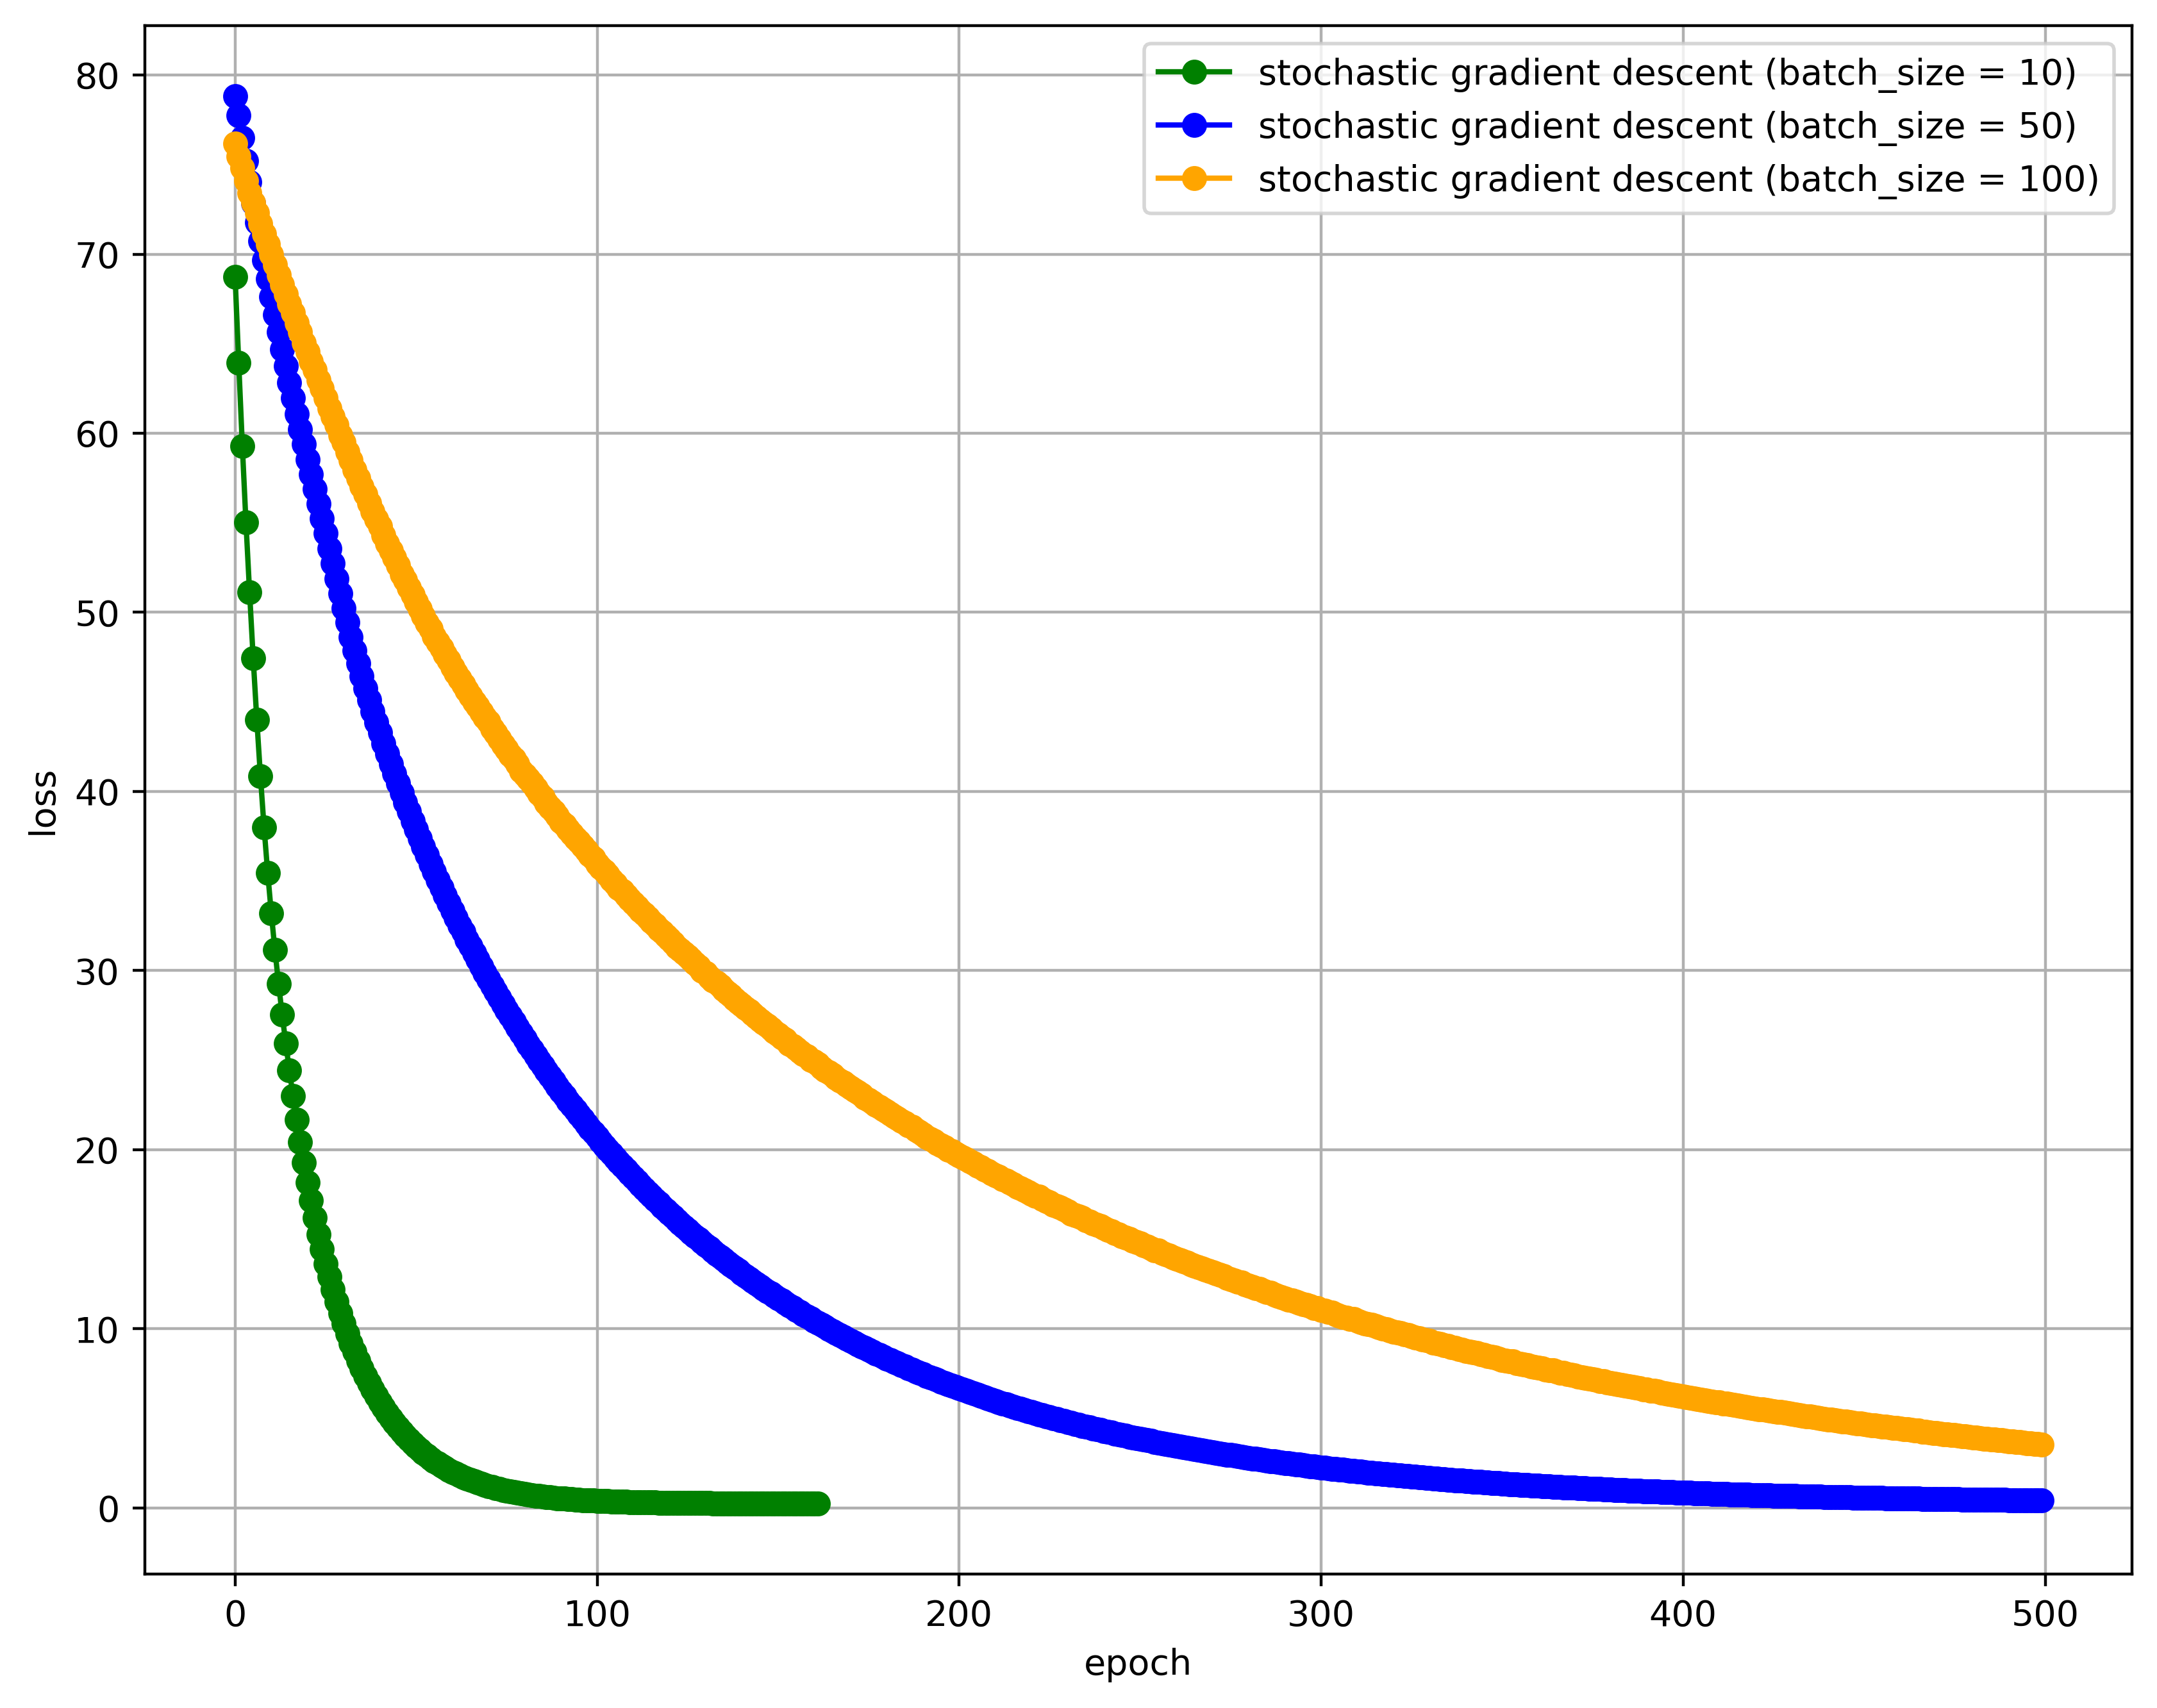

In [162]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# trying same initial lr of 0.001 for each mini batch size
lr = [0.001, 0.001, 0.001]
fig, ax = plt.subplots(figsize=(10, 8), dpi=400)

for i in range(len(bs)):
    
    print ('---------------------------------------')
    print ('batch_size =', bs[i])
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    print ("Time taken: ", (time.time()-start_time))
    print ("Number of epochs: ", len(loss_SGD))
    #TODO
    prec_train = get_precision(W, b, X_train, y_train)
    print ('training precision =', prec_train)

    #TODO
    prec_test = get_precision(W, b, X_test, y_test)
    print ('test precision =', prec_test)
    
    print ("Final value of F(W) = ", loss_SGD[-1])
    print ("Number of epochs until convergence =", len(loss_SGD))
        
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

---------------------------------------
batch_size = 10
Time taken:  2.4796621799468994
Number of epochs:  173
training precision = 0.9851521900519673
test precision = 0.9733333333333334
Final value of F(W) =  0.2397973141673556
Number of epochs until convergence = 173
---------------------------------------
batch_size = 50
Time taken:  0.6841678619384766
Number of epochs:  164
training precision = 0.9844097995545658
test precision = 0.9688888888888889
Final value of F(W) =  0.24315077125404122
Number of epochs until convergence = 164
---------------------------------------
batch_size = 100
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
reduce learning rate to 0.0003125
reduce learning rate to 0.00015625
Time taken:  0.6379499435424805
Number of epochs:  190
training precision = 0.9851521900519673
test precision = 0.9711111111111111
Final value of F(W) =  0.2387549739510054
Number of epochs until convergence

Text(0, 0.5, 'loss')

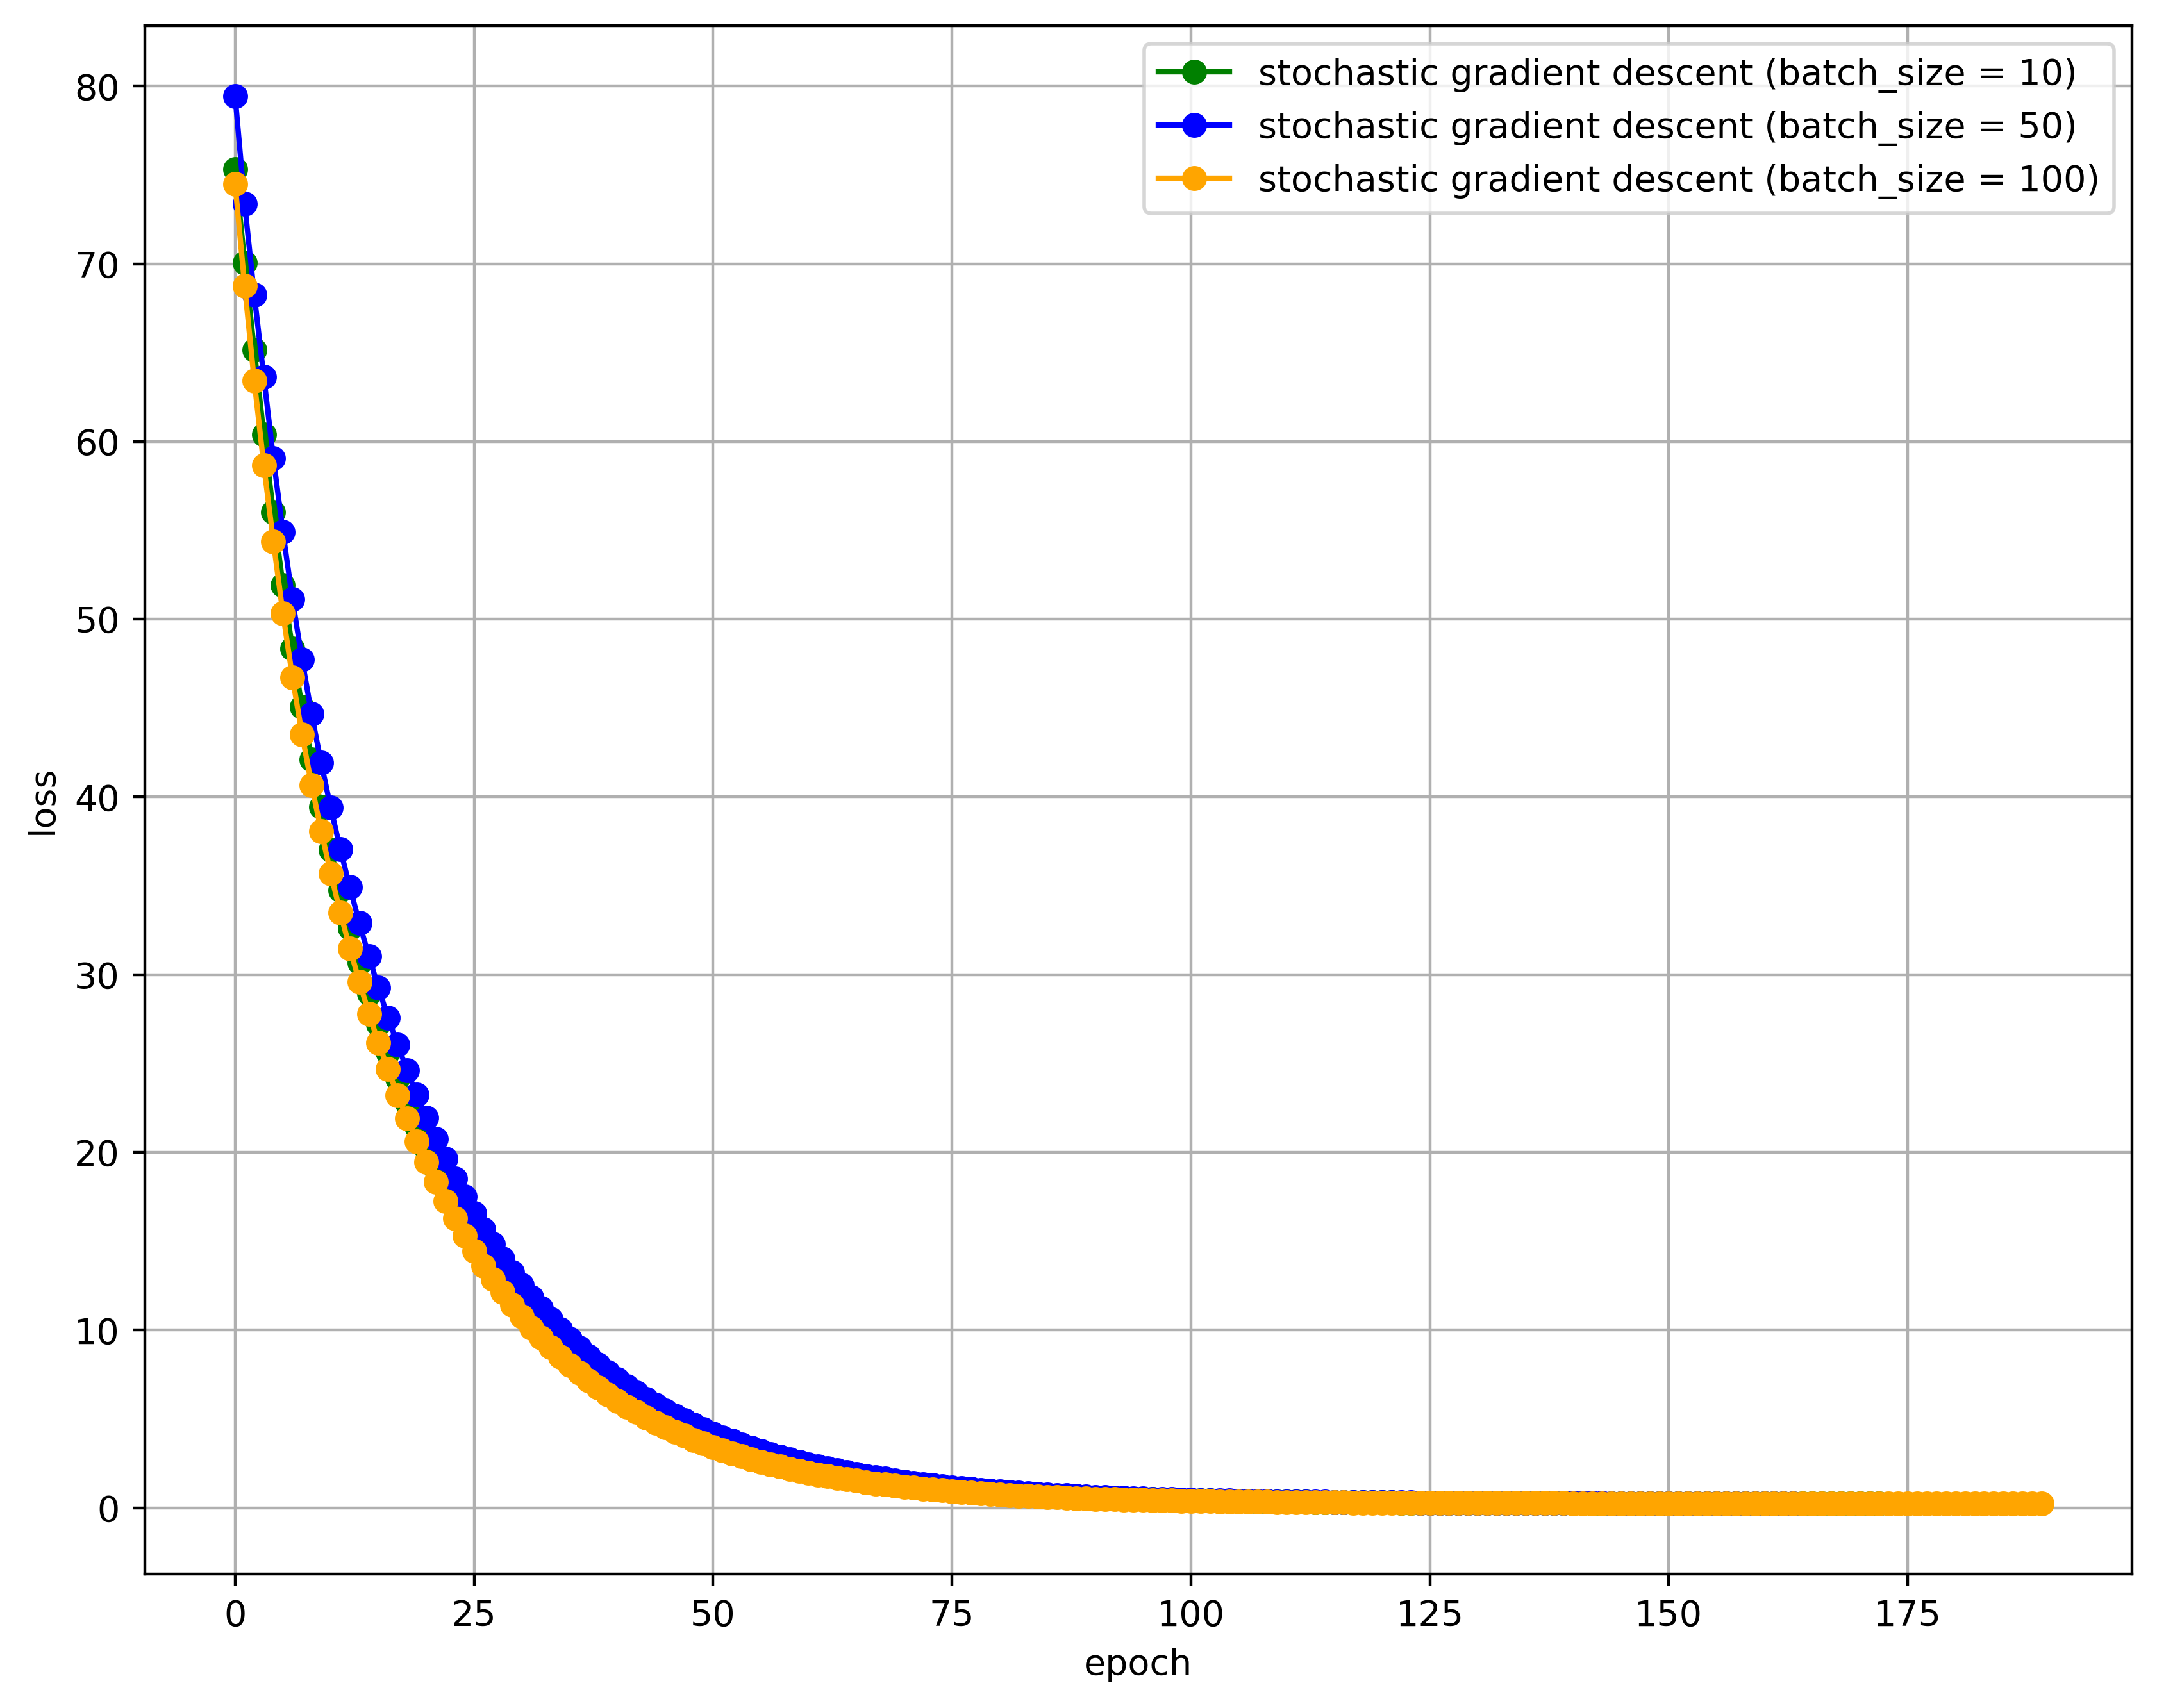

In [156]:
# evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# TODO: different learning rate for different batch size
# tuned learning rate for each mini batch size such that the final value of F(W) is comparable across all batch-sizes
lr = [0.001, 0.005, 0.01]

fig, ax = plt.subplots(figsize=(10, 8), dpi=400)

for i in range(len(bs)):
    
    print ('---------------------------------------')
    print ('batch_size =', bs[i])
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    print ("Time taken: ", (time.time()-start_time))
    print ("Number of epochs: ", len(loss_SGD))
    #TODO
    prec_train = get_precision(W, b, X_train, y_train)
    print ('training precision =', prec_train)

    #TODO
    prec_test = get_precision(W, b, X_test, y_test)
    print ('test precision =', prec_test)
    print ("Final value of F(W) = ", loss_SGD[-1])
    print ("Number of epochs until convergence =", len(loss_SGD))
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

## Learning rate leading to fastest convergence for each mini-batch size

batch_size = 10
---------------------------------------
reduce learning rate to 0.05
reduce learning rate to 0.025
reduce learning rate to 0.0125
Time taken:  0.7119371891021729
training precision = 0.8938381588715665
test precision = 0.8755555555555555
Final value of F(W) =  0.47737315276696635
Number of epochs until convergence = 47
---------------------------------------
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
reduce learning rate to 0.0015625
reduce learning rate to 0.00078125
Time taken:  1.4237971305847168
training precision = 0.9844097995545658
test precision = 0.9711111111111111
Final value of F(W) =  0.23592546664619057
Number of epochs until convergence = 89
---------------------------------------
reduce learning rate to 0.01
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
reduce learning rate to 0.000625
Time taken:  1.1298062801361084
training p

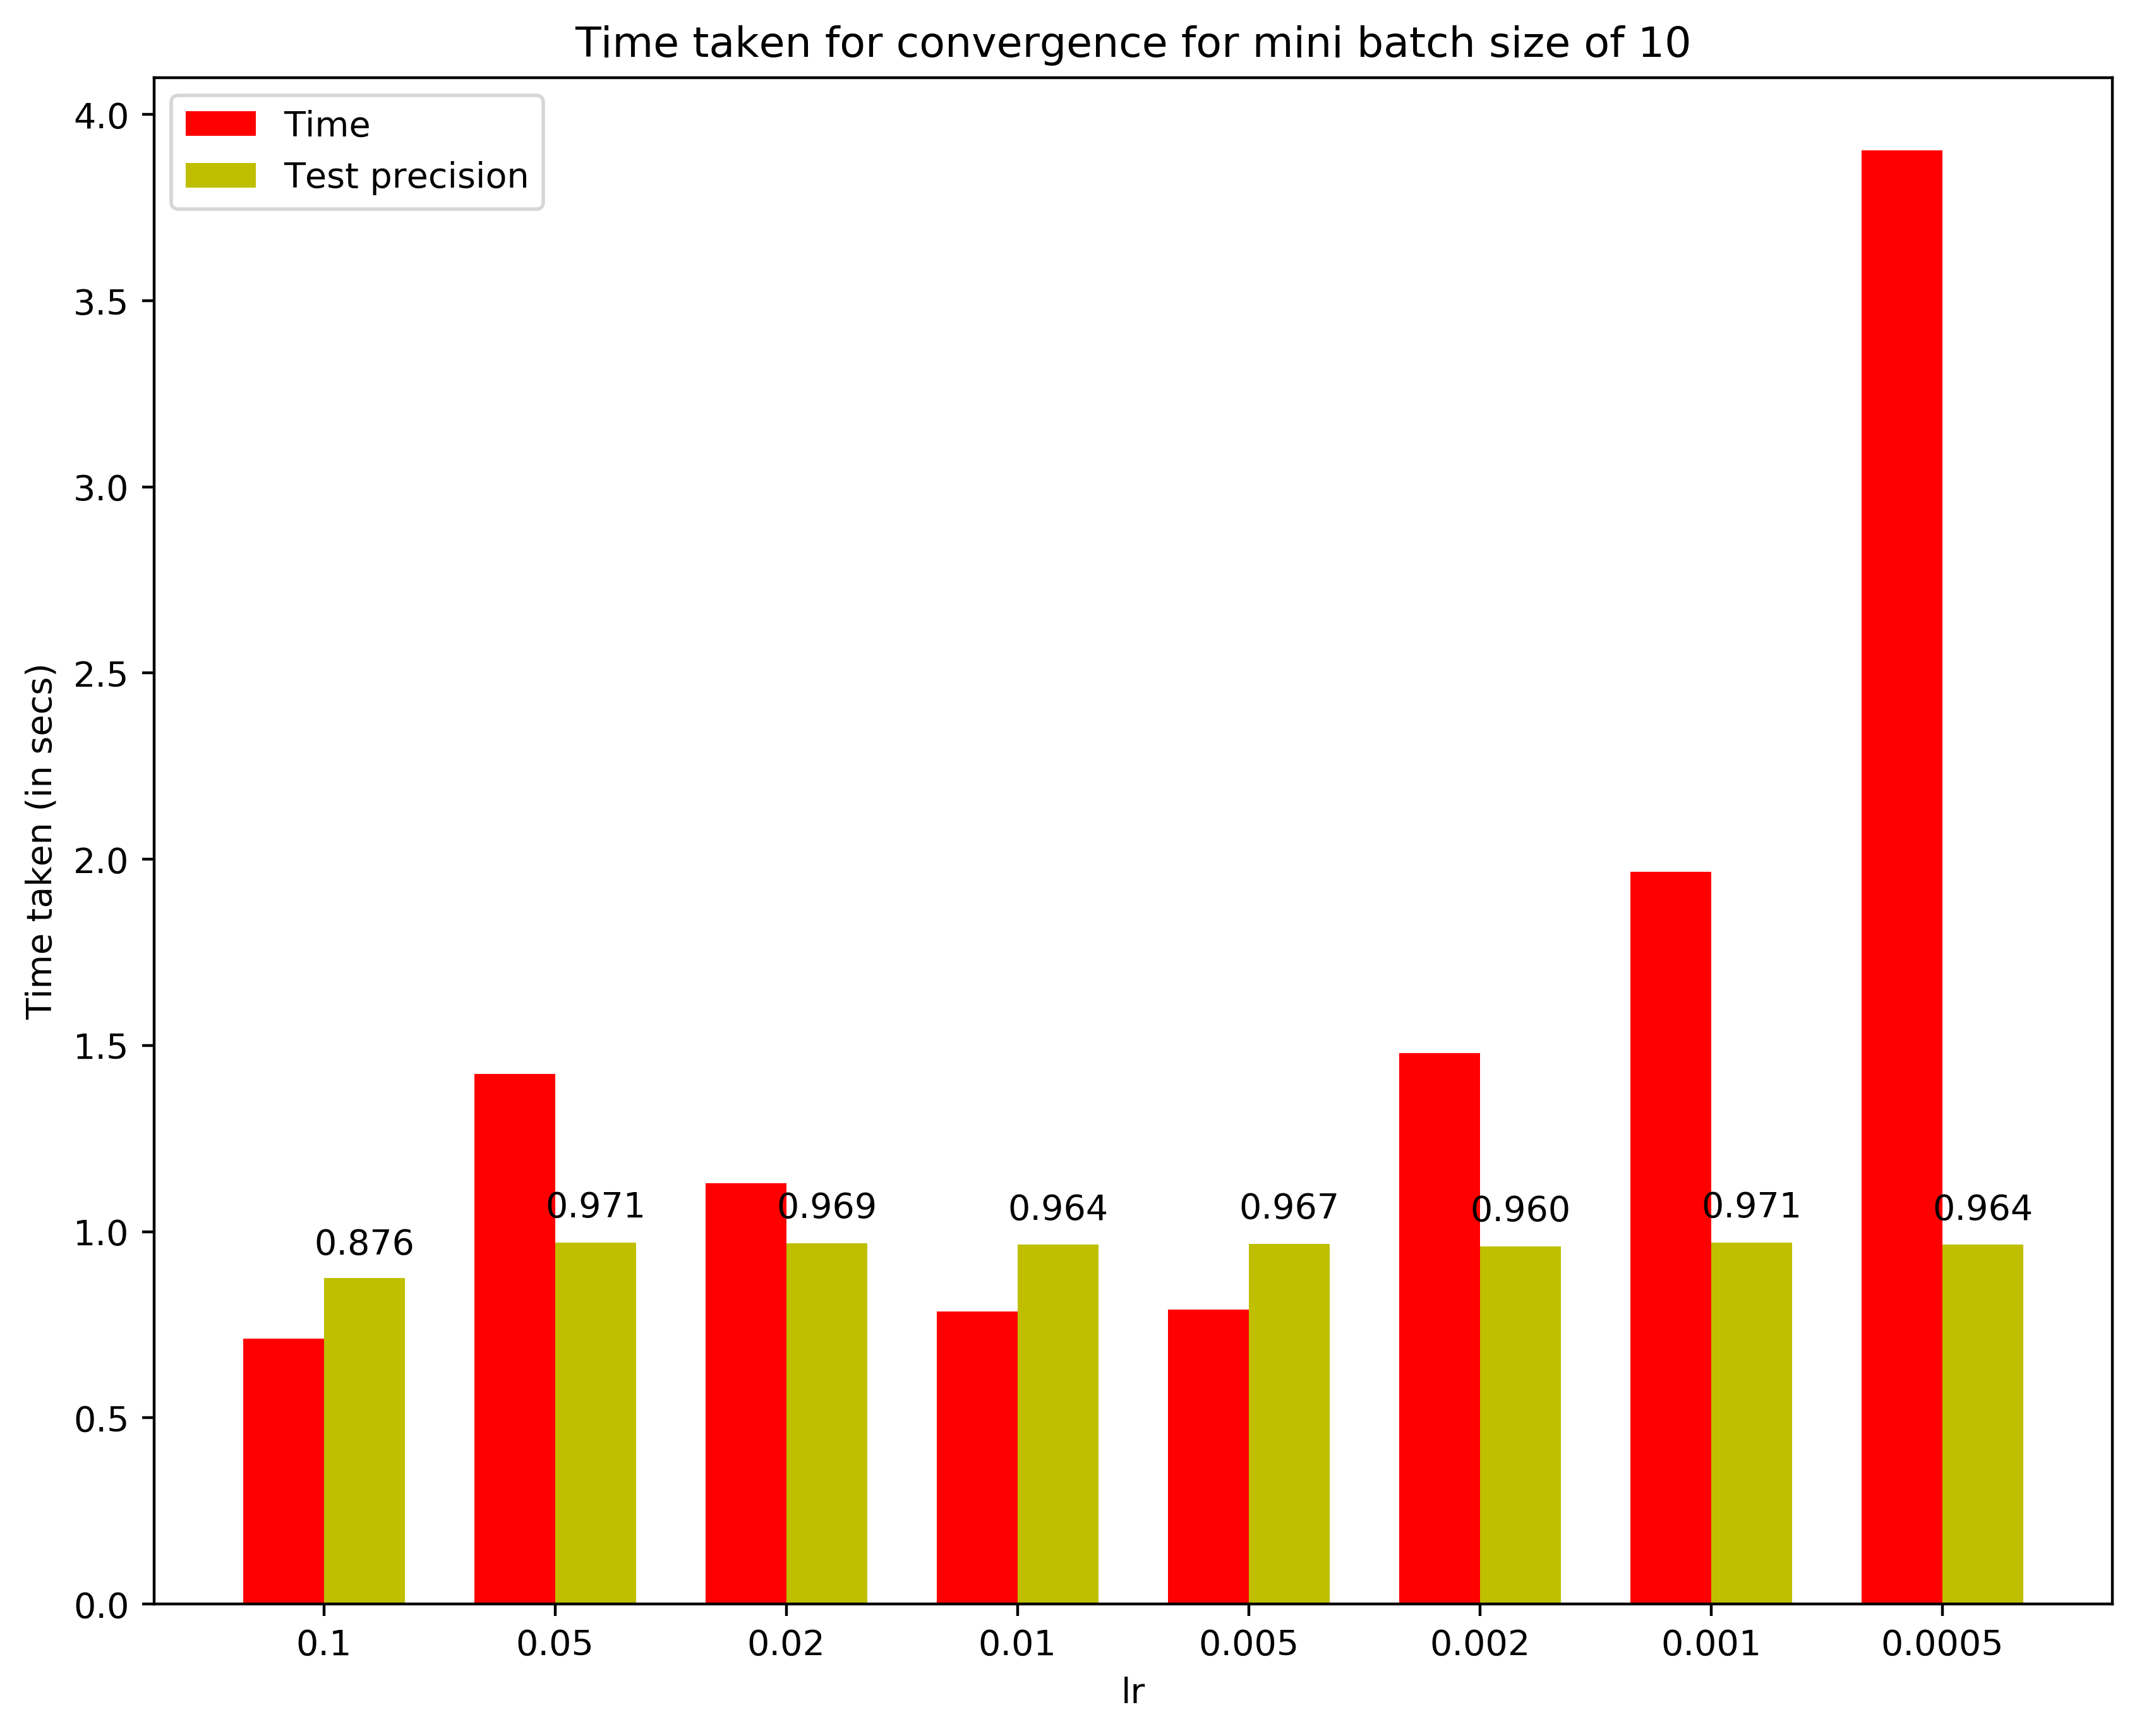

In [158]:
# evaluation of different batch size
lr = [0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005]

fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
print ('batch_size =', 10)
time_takens = []
test_precisions = []
for i in range(len(lr)):
    
    print ('---------------------------------------')
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 10, lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    time_taken = time.time()-start_time
    time_takens.append(time_taken)
    print ("Time taken: ", time_taken)
    prec_train = get_precision(W, b, X_train, y_train)
    prec_test = get_precision(W, b, X_test, y_test)
    test_precisions.append(prec_test)
    print ('training precision =', prec_train)
    print ('test precision =', prec_test)
    print ("Final value of F(W) = ", loss_SGD[-1])
    print ("Number of epochs until convergence =", len(loss_SGD))

index = np.arange(len(lr))
width = 0.35       # the width of the bars

rects1 = ax.bar(index,time_takens, width, color='r',label='Time')
rects2 = ax.bar(index + width, test_precisions, width, color='y',label='Test precision')

# add some text for labels, title and axes ticks
ax.set_xlabel('lr')
ax.set_ylabel('Time taken (in secs)')
ax.set_title('Time taken for convergence for mini batch size of 10')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(lr)
ax.legend(loc='best')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%.3f' % float(height), ha='center', va='bottom')

autolabel(rects2)
plt.show()

batch_size = 50
---------------------------------------
reduce learning rate to 0.05
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
Time taken:  0.3254358768463135
training precision = 0.9844097995545658
test precision = 0.9711111111111111
Final value of F(W) =  0.2403233303487979
Number of epochs until convergence = 67
---------------------------------------
reduce learning rate to 0.025
reduce learning rate to 0.0125
Time taken:  0.20945215225219727
training precision = 0.9703043801039347
test precision = 0.9511111111111111
Final value of F(W) =  0.2532994978138285
Number of epochs until convergence = 48
---------------------------------------
reduce learning rate to 0.01
reduce learning rate to 0.005
Time taken:  0.27999424934387207
training precision = 0.9851521900519673
test precision = 0.9711111111111111
Final value of F(W) =  0.238724237821036
Number of epochs until convergence = 60
------------------

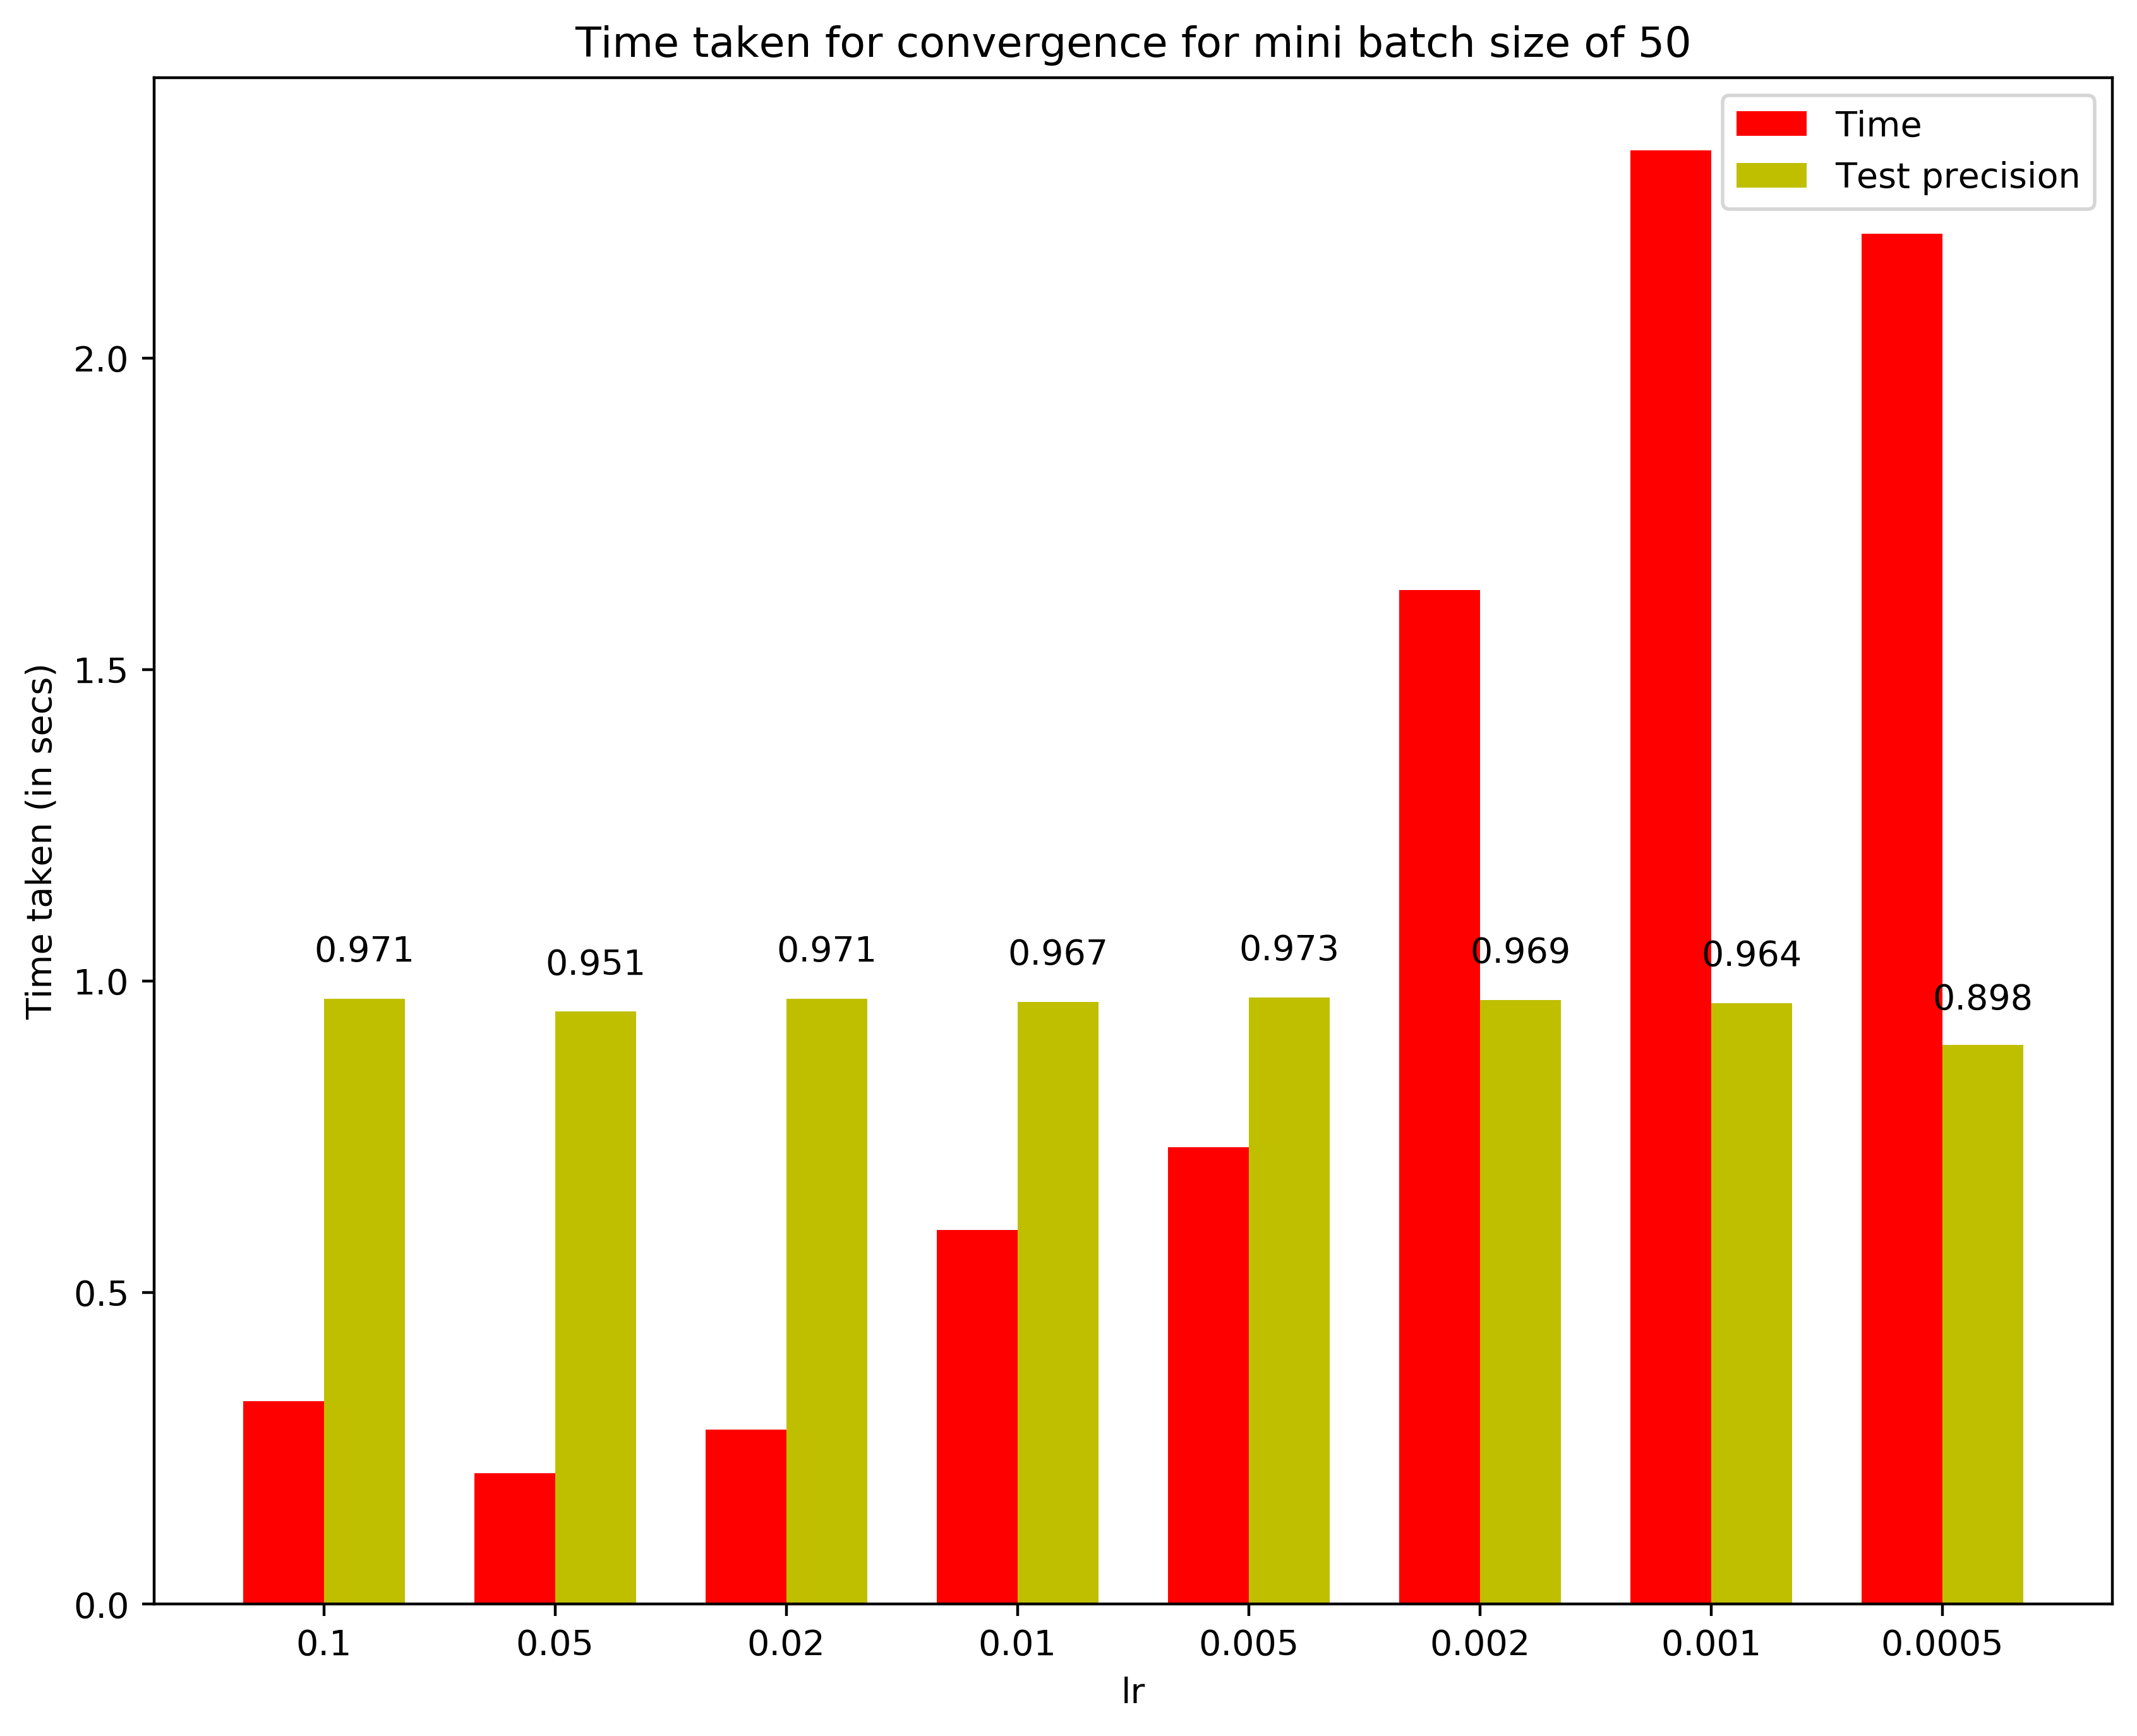

In [159]:
# evaluation of different batch size
lr = [0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005]

fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
print ('batch_size =', 50)
time_takens = []
test_precisions = []
for i in range(len(lr)):
    
    print ('---------------------------------------')
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 50, lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    time_taken = time.time()-start_time
    time_takens.append(time_taken)
    print ("Time taken: ", time_taken)
    prec_train = get_precision(W, b, X_train, y_train)
    prec_test = get_precision(W, b, X_test, y_test)
    test_precisions.append(prec_test)
    print ('training precision =', prec_train)
    print ('test precision =', prec_test)
    print ("Final value of F(W) = ", loss_SGD[-1])
    print ("Number of epochs until convergence =", len(loss_SGD))

index = np.arange(len(lr))
width = 0.35       # the width of the bars

rects1 = ax.bar(index,time_takens, width, color='r',label='Time')
rects2 = ax.bar(index + width, test_precisions, width, color='y',label='Test precision')

# add some text for labels, title and axes ticks
ax.set_xlabel('lr')
ax.set_ylabel('Time taken (in secs)')
ax.set_title('Time taken for convergence for mini batch size of 50')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(lr)
ax.legend(loc='best')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%.3f' % float(height), ha='center', va='bottom')

autolabel(rects2)
plt.show()

batch_size = 100
---------------------------------------
reduce learning rate to 0.05
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
Time taken:  0.30223584175109863
training precision = 0.9806978470675576
test precision = 0.9688888888888889
Final value of F(W) =  0.23377822201427195
Number of epochs until convergence = 71
---------------------------------------
reduce learning rate to 0.025
reduce learning rate to 0.0125
reduce learning rate to 0.00625
reduce learning rate to 0.003125
reduce learning rate to 0.0015625
Time taken:  0.3363151550292969
training precision = 0.985894580549369
test precision = 0.9711111111111111
Final value of F(W) =  0.23209114575038461
Number of epochs until convergence = 84
---------------------------------------
reduce learning rate to 0.01
reduce learning rate to 0.005
reduce learning rate to 0.0025
reduce learning rate to 0.00125
Time taken:  0.5081679821014404
training precision = 0.985894580549369
test p

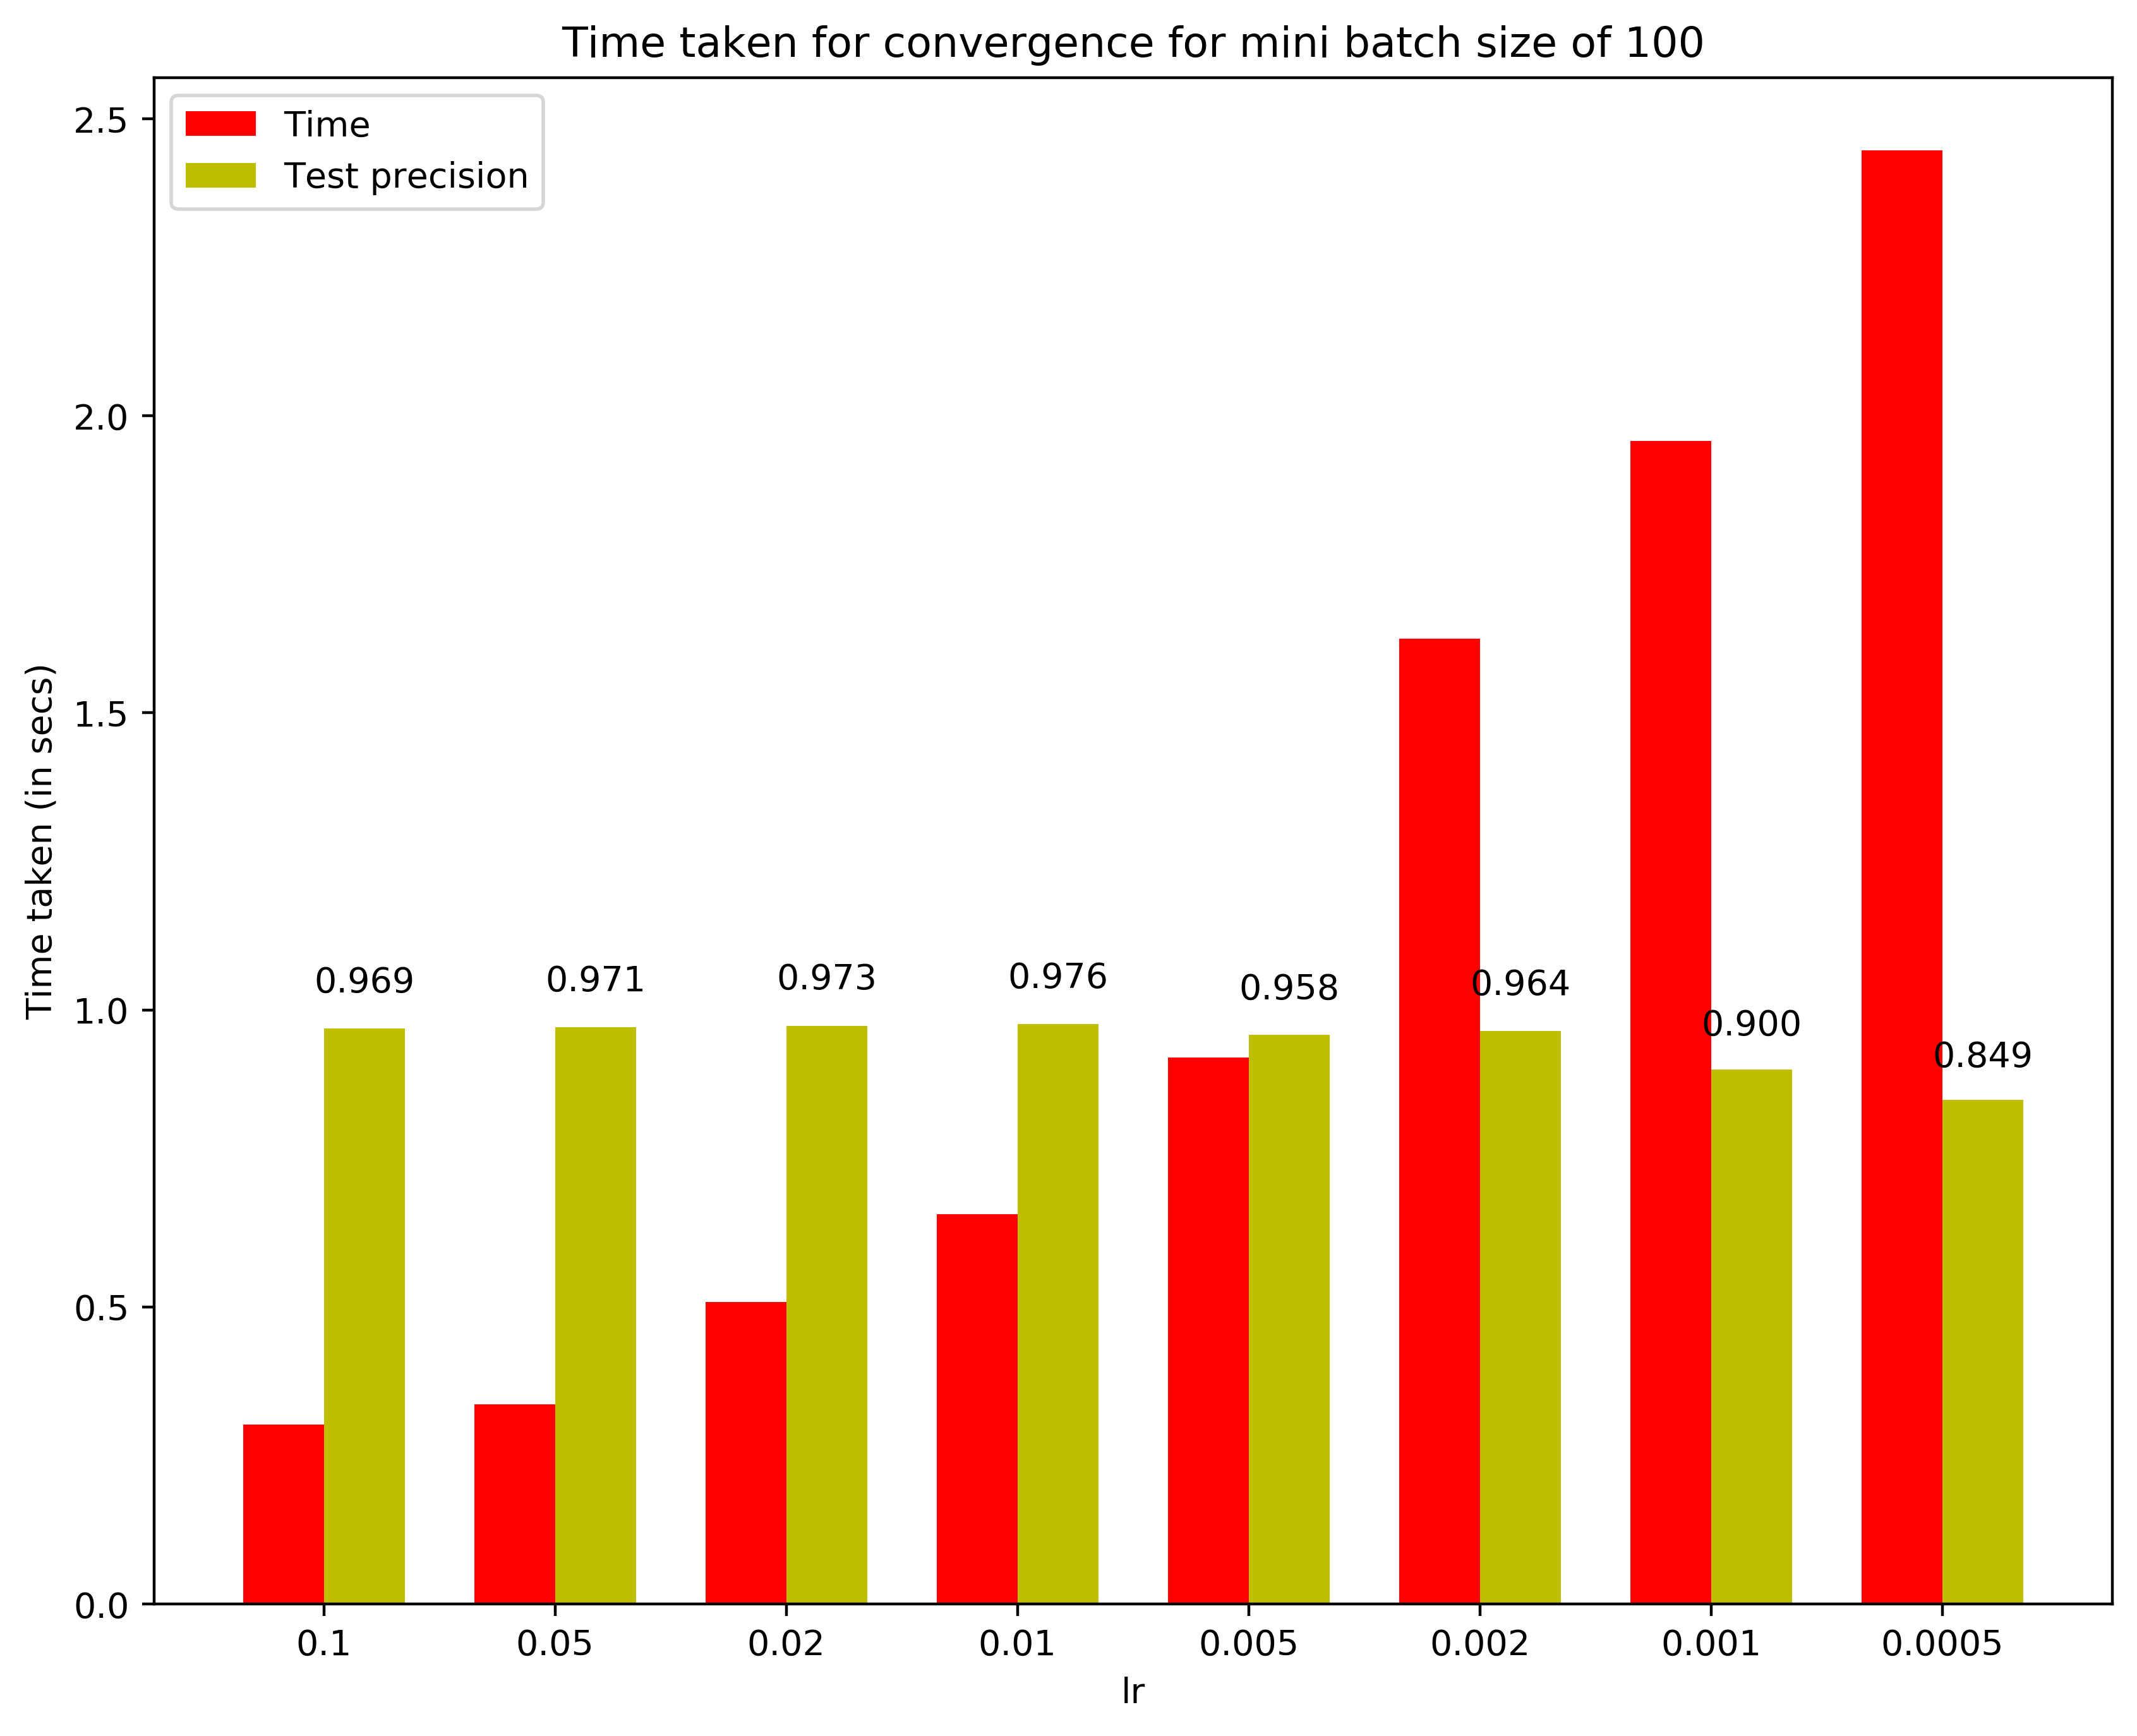

In [160]:
# evaluation of different batch size
lr = [0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005]

fig, ax = plt.subplots(figsize=(10, 8), dpi=400)
print ('batch_size =', 100)
time_takens = []
test_precisions = []
for i in range(len(lr)):
    
    print ('---------------------------------------')
    start_time = time.time()
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, 100, lr[i], eta = 2.0e-1, eps = 1.0e-4, max_epoch = 500)
    time_taken = time.time()-start_time
    time_takens.append(time_taken)
    print ("Time taken: ", time_taken)
    prec_train = get_precision(W, b, X_train, y_train)
    prec_test = get_precision(W, b, X_test, y_test)
    test_precisions.append(prec_test)
    print ('training precision =', prec_train)
    print ('test precision =', prec_test)
    print ("Final value of F(W) = ", loss_SGD[-1])
    print ("Number of epochs until convergence =", len(loss_SGD))

index = np.arange(len(lr))
width = 0.35       # the width of the bars

rects1 = ax.bar(index,time_takens, width, color='r',label='Time')
rects2 = ax.bar(index + width, test_precisions, width, color='y',label='Test precision')

# add some text for labels, title and axes ticks
ax.set_xlabel('lr')
ax.set_ylabel('Time taken (in secs)')
ax.set_title('Time taken for convergence for mini batch size of 100')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(lr)
ax.legend(loc='best')


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, '%.3f' % float(height), ha='center', va='bottom')

autolabel(rects2)
plt.show()